PART-II

Import and warehouse data:

In [43]:
#Import all necessary LIBRARIES
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')


In [44]:
d1 = pd.read_csv("Data1.csv") 
d2 = pd.read_csv("Data2.csv")

In [45]:
#Load the datasets as pandas dataframes
df1 =pd.DataFrame(d1,
                  columns = ['ID','Age', 'CustomerSince','HighestSpend', 'ZipCode','HiddenScore',
                     'MonthlyAverageSpend', 'Level'])
df1


          

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2
...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3
4996,4997,30,4,15,92037,4,0.4,1
4997,4998,63,39,24,93023,2,0.3,3
4998,4999,65,40,49,90034,3,0.5,2


In [46]:
df2 =pd.DataFrame(d2,
                 columns = ['Mortgage' ,'Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 
                  'LoanOnCard'])
df2


,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,0,1,0,0,0,NaN
1,0,1,0,0,0,NaN
2,0,0,0,0,0,NaN
3,0,0,0,0,0,NaN
4,0,0,0,0,1,NaN
...,...,...,...,...,...,...
4995,0,0,0,1,0,0.0
4996,85,0,0,1,0,0.0
4997,0,0,0,0,0,0.0
4998,0,0,0,1,0,0.0


In [47]:
#exploring size of each data file before merging them
df1.size
print("size of df1:",df1.size)
df1.shape
print("shape of df1:",df1.shape)
df2.size
print("size of df2:",df2.size)
d2.shape
print("shape of df2:",df2.shape)



size of df1: 40000
shape of df1: (5000, 8)
size of df2: 30000
shape of df2: (5000, 6)


In [48]:
df1.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [49]:
df2.columns

Index(['Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

d1 contains 5000 rows nd 8 columns. d2 has 5000 rows and 6 columns

In [50]:
#combining the dataframes
df=pd.concat([df1,df2],axis =1)

In [51]:
# shape and size after merge
df.shape
print("shape of df:",df.shape)
df.size
print("size of df:",df.size)

shape of df: (5000, 14)
size of df: 70000


dataset has 5000 rows and 14 columns

2. Data cleansing:


• Explore and if required correct the datatypes of each attribute

In [52]:
df.head()# display first five rows

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [53]:
df.tail()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0.0


In [54]:
df.info()
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

There are 2 float types and 12 integer datattype

In [55]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

There are Null values which need to be imputed

In [56]:
#imputing with data median
df = df.fillna(df.median())

In [57]:
df.isnull().sum()# checking for null values again

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

There are no null values now

In [58]:
df.describe().transpose()#statastical summary of data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


by seeing stastical sumary we can say there are negitive values in column CustomerSince


we can also see min value in zipcode columns is 9307 which is 4 digit.remaining all are of 5 digits so this can be an outlier

In [59]:
#checking summary of that column once again
df['CustomerSince'].describe()


count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: CustomerSince, dtype: float64

In [60]:
# Making negitive values from column customersince into Non-Negitive values by applying abs()

df['CustomerSince'] =df['CustomerSince']. apply(abs)

In [61]:
df['CustomerSince'].describe().transpose()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: CustomerSince, dtype: float64

In [62]:
# checking distribution of target variable
df['LoanOnCard'].value_counts()


0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

In [63]:

df['LoanOnCard'].unique()

array([0., 1.])

In [64]:
#converting target variale from float to int for convinience
df['LoanOnCard'] =df['LoanOnCard'].astype(int)

In [65]:
#checking dtypes after converting target variable
df.dtypes


ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard               int32
dtype: object

3. Data analysis & visualisation:



Perform detailed statistical analysis on the data.



In [66]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
CustomerSince,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
HighestSpend,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZipCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
HiddenScore,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
MonthlyAverageSpend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Level,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Security,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


Age is continuous variable but now it is discrete. smallest as 23 and largest is 67

id is qualitative and nominal id starts at 1 and ends at 5000

Highest spend is quantitative with maximum value 224 and min is 8 .mean is 74 and median is 64

In [67]:
#checking  the columns of dataset
df.columns



Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis. 

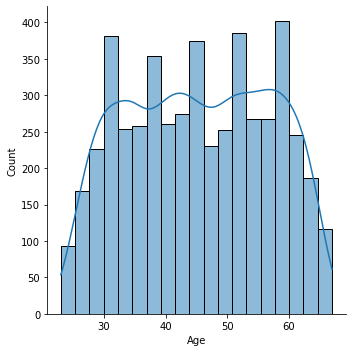

In [68]:
import seaborn as sns
sns.displot(df['Age'],kde=True)

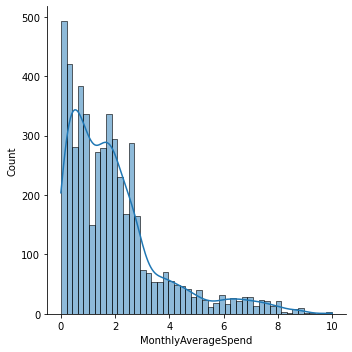

In [69]:
sns.displot(df['MonthlyAverageSpend'],kde=True)

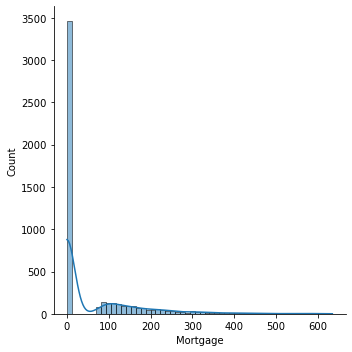

In [70]:
sns.displot(df['Mortgage'],kde=True)

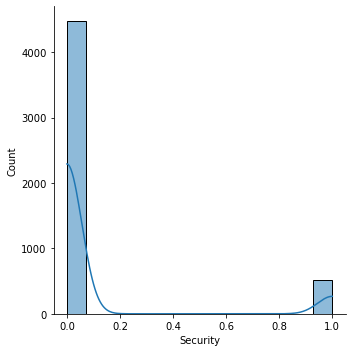

In [71]:
sns.displot(df['Security'],kde=True)

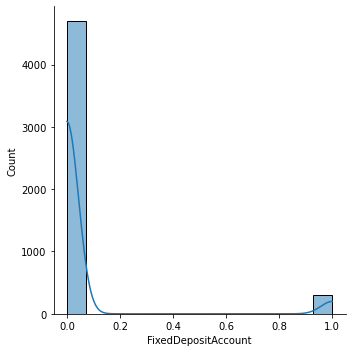

In [72]:
sns.displot(df['FixedDepositAccount'],kde=True)

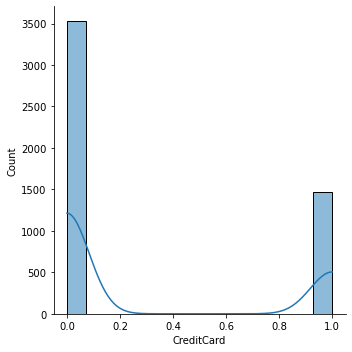

In [73]:
sns.displot(df['CreditCard'],kde=True)

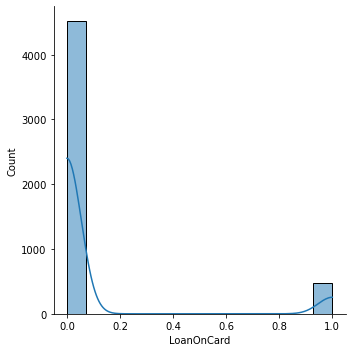

In [74]:
sns.displot(df['LoanOnCard'],kde=True)

we can see that the columns  mortgage fixed deposits and security has zero mostly

<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

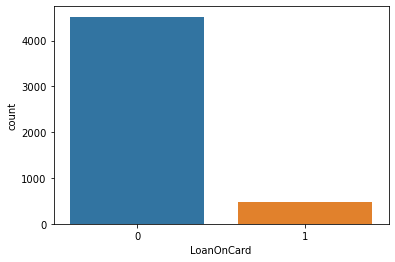

In [75]:
sns.countplot(x = df['LoanOnCard'])

we can see that target distribution is unequal dataset is imbalanced 

In [76]:
df.drop(['ZipCode'],axis=1)

,ID,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,3,0.5,2,0,0,0,1,0,0


In [77]:
df=df.drop(df.columns[0],axis=1) # droppind id col using index

dropping colums ID and Zipcode as they are not useful for analysis

In [78]:

#checking for cols after dropping few columns
df.columns


Index(['Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

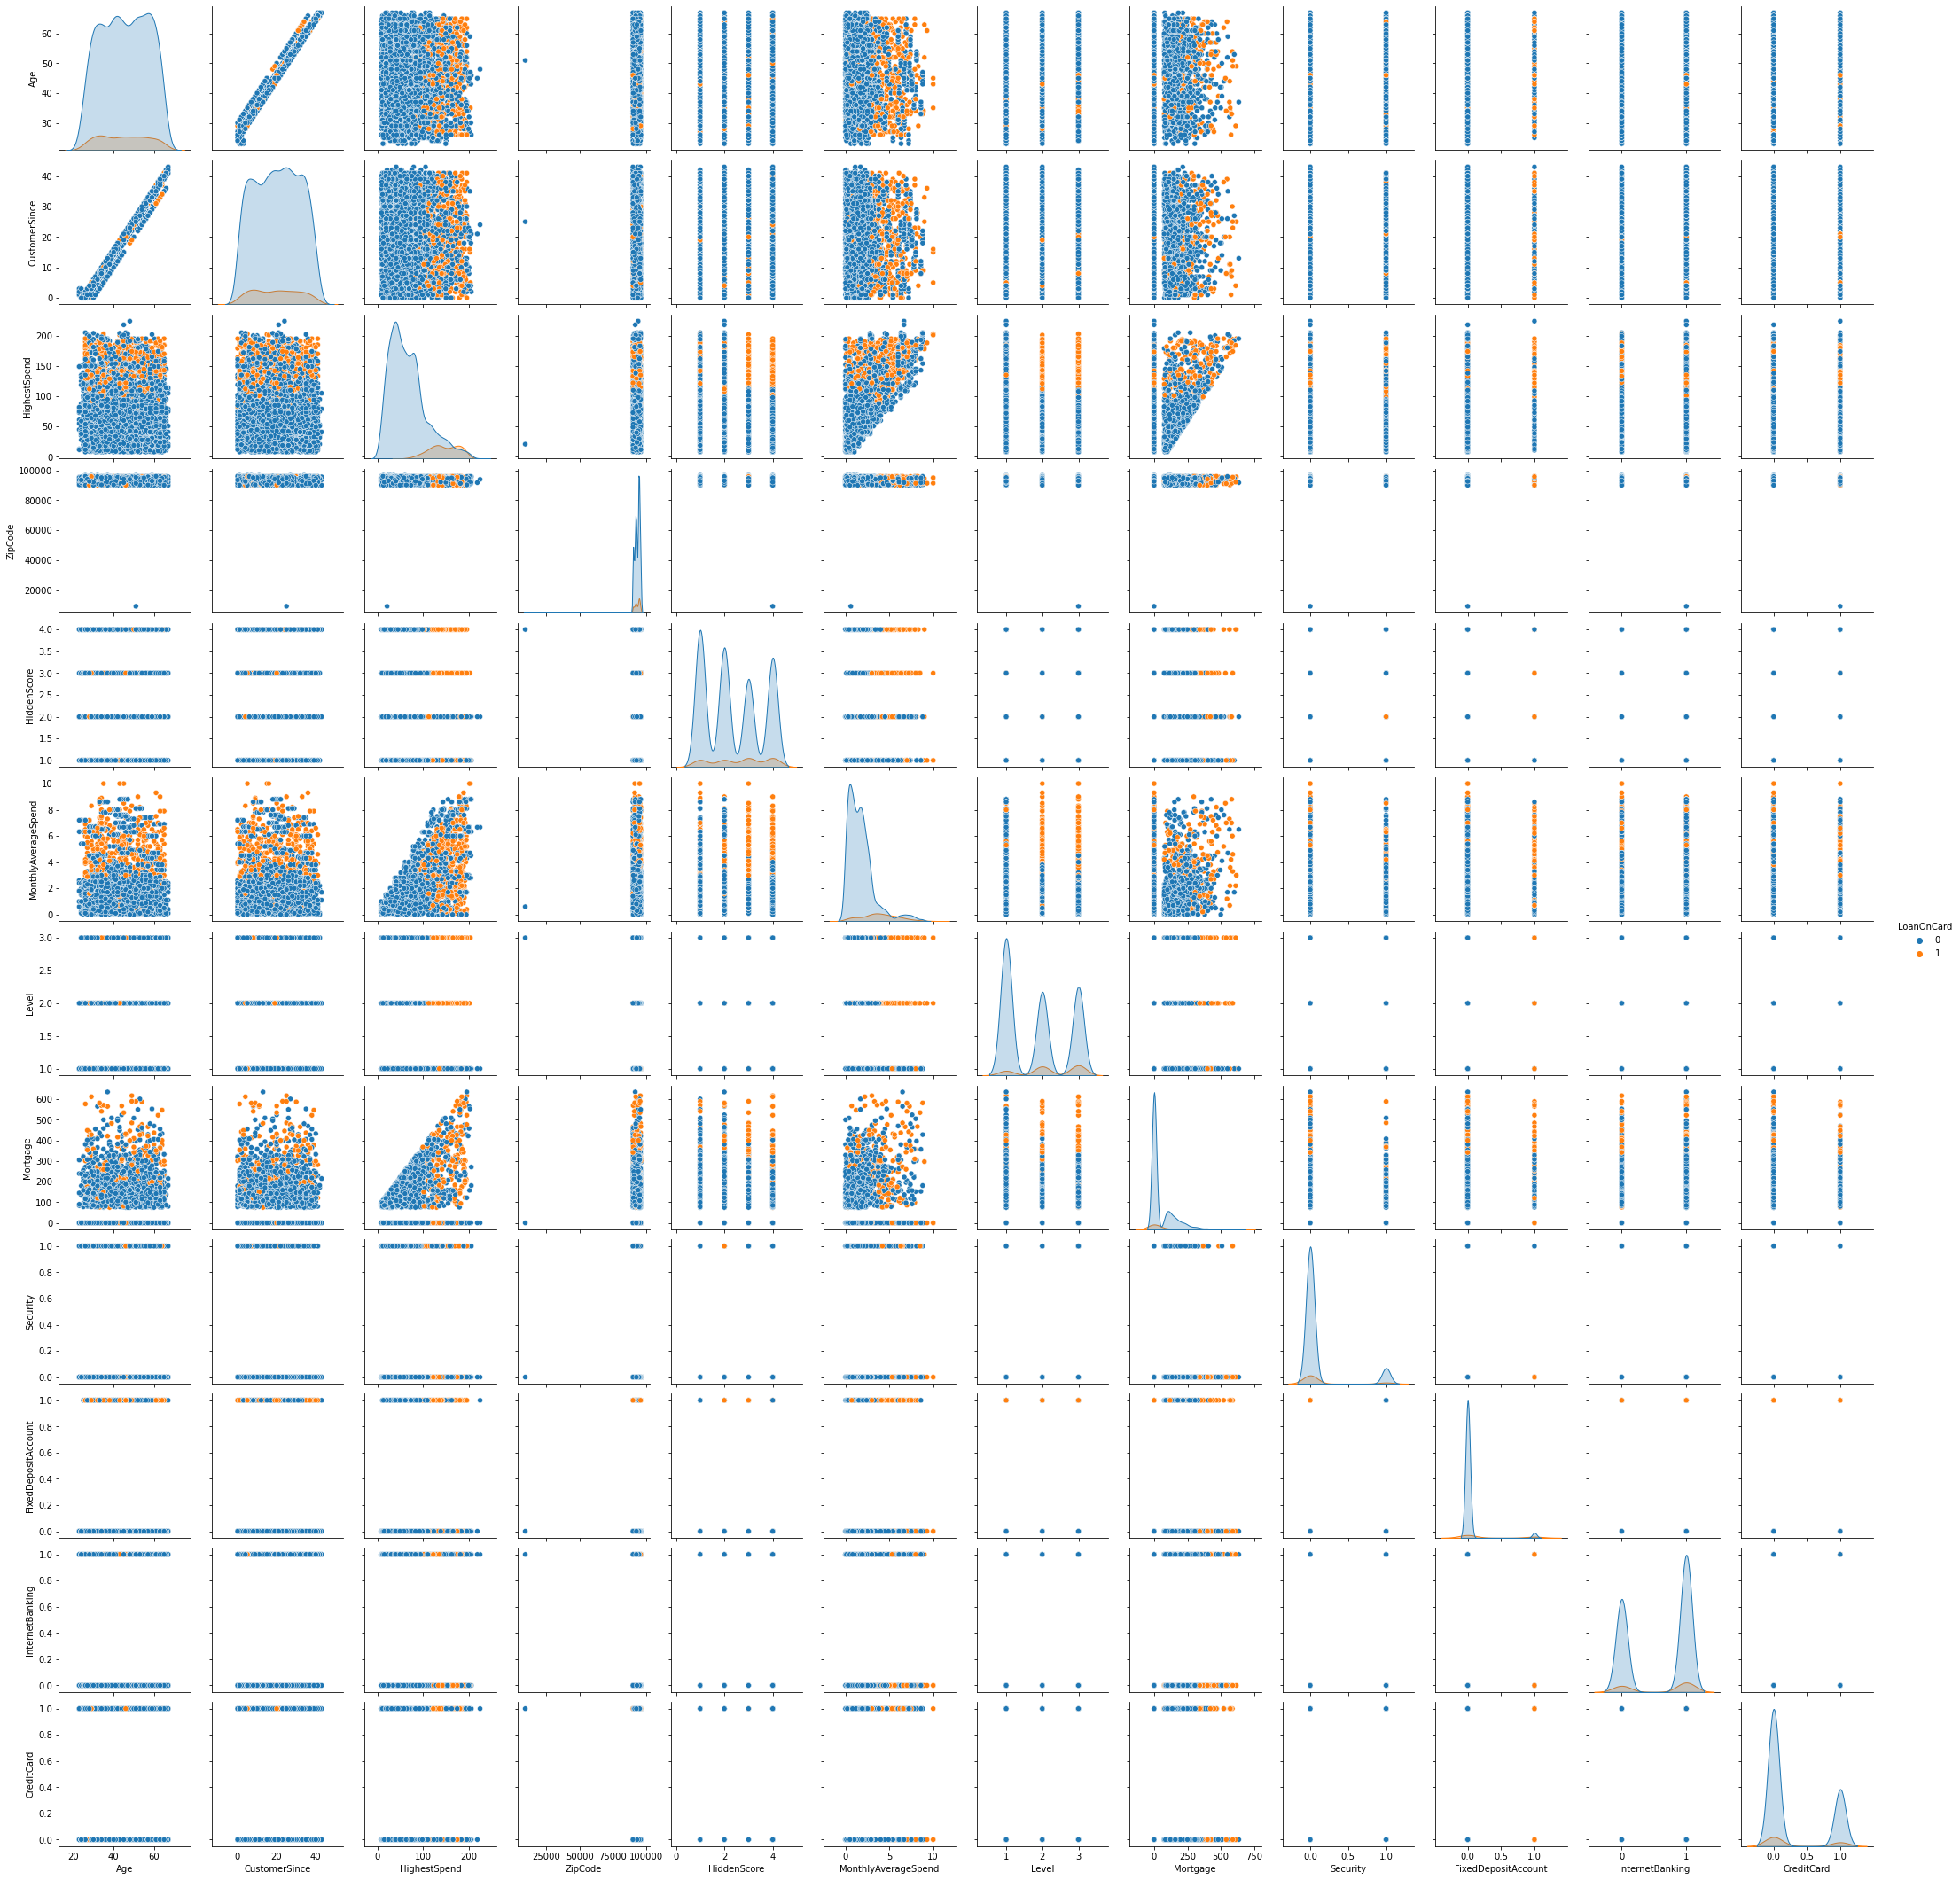

In [79]:
sns.pairplot(df, diag_kind= 'kde', hue='LoanOnCard')

 by seeing above visualisation we can see that age is highly correlated.


In [ ]:
# correlation
corr =df.corr()
sns.heatmap(corr,annot=True)

4. Data pre-processing:


• Segregate predictors vs target attributes



In [81]:
df.drop(['Age','InternetBanking'],axis=1,inplace =True)
df.columns

Index(['CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [82]:
X=df.drop('LoanOnCard',axis=1) #predictor variables
Y=df['LoanOnCard'] #target variable


• Perform normalisation or scaling if required.

In [83]:
from scipy.stats import zscore
XScaled =X.apply(zscore) #converting attributes to Z scale
XScaled.describe()


,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.001421e-16,1.939449e-16,1.513445e-15,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.764019e+00,-1.428969e+00,-3.951919e+01,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-6.453143e-01
25%,-8.879059e-01,-7.554825e-01,-5.851619e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-6.453143e-01
50%,-1.179249e-02,-2.123482e-01,1.340930e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,-6.453143e-01
75%,8.643209e-01,5.263146e-01,6.860245e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,1.549632e+00
max,2.003268e+00,3.263712e+00,1.648959e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,1.549632e+00


Check for target balancing. Add your comments.

In [84]:
Y.value_counts()

0    4520
1     480
Name: LoanOnCard, dtype: int64

• Perform train-test split

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [86]:
#balancing the data
from imblearn.over_sampling import SMOTE
from collections import Counter
sm =SMOTE()
X_sm,Y_sm=sm.fit_resample(X_train,Y_train)
counter =Counter(Y_sm)
print(counter)


Counter({0: 3160, 1: 3160})


<AxesSubplot:xlabel='LoanOnCard', ylabel='count'>

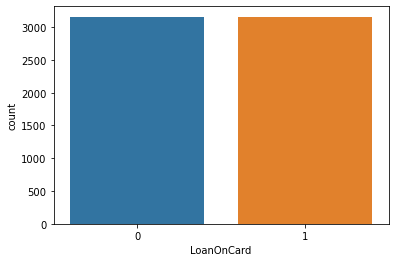

In [87]:
sns.countplot(x = Y_sm)

Model training, testing and tuning:


• Design and train a Logistic regression and Naive Bayes classifiers.

Naive Bayes classifier

In [88]:
# naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report,confusion_matrix
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
NB =GaussianNB()
NB.fit(X_train,Y_train)
y_predicted = NB.predict(X_test)
score_train = NB.score(X_train,Y_train)
print("train set score is :", score_train)

# Display the classification accuracy
test_accuracy = accuracy_score(Y_test, y_predicted)
print("accuracy of test data :",test_accuracy)

#classification report
class_rep =classification_report(Y_test,y_predicted)
print('\n{}'.format(class_rep))
#confusion matrix
cm =confusion_matrix(Y_test,y_predicted)
print('\nConfusion Matrix\n',cm)


train set score is : 0.888
accuracy of test data : 0.8853333333333333

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1360
           1       0.42      0.61      0.50       140

    accuracy                           0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.89      1500


Confusion Matrix
 [[1243  117]
 [  55   85]]


In [95]:
#naive bayes and over sampling
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report,confusion_matrix
X_train,X_test,Y_train,Y_test=train_test_split(X_sm,Y_sm,test_size=0.3,random_state=10)
NB =GaussianNB()
NB.fit(X_train,Y_train)
y_predicted = NB.predict(X_test)
score_train = NB.score(X_train,Y_train)
print("train set score is :", score_train)

# Display the classification accuracies 
test_accuracy = accuracy_score(Y_test, y_predicted)
print("accuracy of test data :",test_accuracy)

#classification report
class_rep =classification_report(Y_test,y_predicted)
print('\n{}'.format(class_rep))

#confusion matrix
cm =confusion_matrix(Y_test,y_predicted)
print('\nConfusion Matrix\n',cm)



train set score is : 0.8910488245931284
accuracy of test data : 0.884493670886076

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       976
           1       0.87      0.90      0.88       920

    accuracy                           0.88      1896
   macro avg       0.88      0.88      0.88      1896
weighted avg       0.89      0.88      0.88      1896


Confusion Matrix
 [[850 126]
 [ 93 827]]


In [90]:
# logistic regression without hyperparameter tuning

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)
LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_predicted = LR.predict(X_test)
score_train = LR.score(X_train,Y_train)
print("train set score is :", score_train)

# Display the classification accuracies 
test_accuracy = accuracy_score(Y_test, y_predicted)
print("accuracy of test data :",test_accuracy)

#classification report
class_rep =classification_report(Y_test,y_predicted)
print('\n{}'.format(class_rep))

#confusion matrix
cm =confusion_matrix(Y_test,y_predicted)
print('\nConfusion Matrix\n',cm)



train set score is : 0.9102857142857143
accuracy of test data : 0.9006666666666666

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1360
           1       0.46      0.33      0.38       140

    accuracy                           0.90      1500
   macro avg       0.69      0.64      0.66      1500
weighted avg       0.89      0.90      0.89      1500


Confusion Matrix
 [[1305   55]
 [  94   46]]


In [97]:
# logistic regression with hyperparameter tuning

In [98]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l2'], 'C' : [0.001,0.01,0.1,1,10,100],'max_iter' : [100,110,120,130,140]}
Grid_search = GridSearchCV(LogisticRegression() ,parameters)
Grid_search.fit(X_train,Y_train)
Grid_search.best_params_


{'C': 1, 'max_iter': 120, 'penalty': 'l2'}

In [100]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=12)
LR = LogisticRegression(penalty='l2',max_iter=120,C=1)
LR.fit(X_train,Y_train)
y_predicted = LR.predict(X_test)
score_train = LR.score(X_train,Y_train)
print("train set score is :", score_train)

# Display the classification accuracy
test_accuracy = accuracy_score(Y_test, y_predicted)
print("accuracy of test data :",test_accuracy)

#classification report
class_rep =classification_report(Y_test,y_predicted)
print('\n{}'.format(class_rep))

#confusion matrix
cm =confusion_matrix(Y_test,y_predicted)
print('\nConfusion Matrix\n',cm)


train set score is : 0.9402857142857143
accuracy of test data : 0.9353333333333333

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1359
           1       0.69      0.57      0.62       141

    accuracy                           0.94      1500
   macro avg       0.82      0.77      0.79      1500
weighted avg       0.93      0.94      0.93      1500


Confusion Matrix
 [[1323   36]
 [  61   80]]


conclusion on the results.

coming to accuracy, naive bayes gives accuracy of 88.5%

The data set intially was imbalanced which is balanced using imblearn

we observe when data set is balanced the accuracy score is 88.4% for naive bayes model 

score of training set has increased 

logistic regression without hyperparameter tuning gives an accuracy of 90%

logistic regression with hyperparameter tuning gives an accuracy of 93.8%

class 0 represents customers who has not accepted loan

class 1 represents customers who  accepted loan

among 5k customers only 480 i.e 9.6% accepted loan offered to them

metrics of classification report :

precision :when positive result is predicted how much is it true

recall : when the result is actually positive how often it is predicted correctly

In our project precision tell us about customer didnot accept loan but predicted as accepted

recall tell us customer accept loan but predicted as not accepted

in our case recall  would have  importance

choosing recall and f1-score as evaluation metric i would choose model built using naive bayes without oversampling

There  are no cases of overfit

 Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future

it would be better if dataset was balanced in prior